<H1>Project Task: </H1>
The aim of the project is to predict the failure of HAGC System having 21 indicators in next 48 hours.

Inorder to solve the problem I have implemented two methods to apply:

<b> 1) Anamoly Detection </b>

<b> 2) Supervised Machine Learning Methods </b>

Four files were given, and the file with indicator reaadings has been chose to apply the above methods as the file has indicator readings and prospective features.

<b> Data Description </b>

Data consists of Four Files: 1) File 1: Contains  Downtimes (This includes both prevenetive & Corrective maintenanace records) 2) File 2: Contains the Data from  February 2011 to Febrauary 2013 3) File 3 consists of maintenaace data and works comments. 4) File 4 consists of the descriptions of the Asset and its indicators.


<b> Data Cleaning: </b>

1) All the three files are have been Filtered to get the data only for asset "544-630".

2) Columns with Time stamp in all the files have been seperated as two columns, i.e. Date and Time. This is done to concatenate Files based on the Dates. Why should we concatenate using date will be expalined in the approach section.

3) Columns with redundant data and constant varaince have been removed in order to reduce the number of dimensions.

4) Indicator Reading Column has been cleaned to get retreive only numbers.

<b> Approach </b>

<b> 1) Anamoly Detection: </b>

For the given problem, the aim is to predict if the machine fails. It is clearly understood that, the given data is unlabelled, Anamoly Detection comes into picture at such situations.

Anomaly Detection is the problem of finding patterns in data that do not conform to a model of “normal” behavior. It helps to detect abnormal behavior which can be an indication of systems failure , and they need to be able to trigger the appropriate steps towards taking corrective actions. In each case, it is important to characterize what is normal, what is deviant or anomalous and how significant is the anomaly. It is necessary to characterize the normal state of the system by observing data about the system over a period of time when the system is deemed normal by observers and users of that system, and to use this characterization as a baseline to flag anomalous behavior.

Relating this to our problem, we need to detect the abnormal readings that help us to learn when the system would fail over a period of time.

<b> Why should we apply only Anamolus detection and not any other Supervised Machine Learning Algorithm? </b>

The reason we have applied this because, when the data is convereted into Logitudinal form and observed the machine failure time, there were very less number of anamolies i.e. negative samples (machine failure)  comapred to postivie samples (normal behaviour of the machine). Hence, It is easy to train a model on the positive samples and then predict the negative Data.

<b> Steps followed to implement Anamoly Detection </b>

<b> Feature Engineering: </b>


1) We have 21 indicators for the asset given and not all the indicators  with abnormal behaviour have been lead to downtime. If only rest indicators  are monitored, then downtime Costs can be reduced. It has been observed that 10 out of 21 indicators have a prominenet abnormal behaviour which has led to downtime. Hence the data for only these indiactors has been used to preedict the failure.

2) Along with the indicator reading we have also have othere features the help to predict the failure like:

->'Indicator State Name': Tells the state of the indicator reading. This feature has been considered  because this helps to understed the if the reading is an anamoly.

-> 'Alarm Type Name': Tells Type of the Alarm, i.e if its critical/warning or low alarm. This reeading along with other tells if an alarm is given for a partiular indicator reading.

->'Fixed During Inspection': Boolean Feature, tells if the indicator is fixed or not. This feature has been taken beacuse, if the indicator is fixed many a times and other indicators are not then this may lead to failure of the machine.

-> 'Acknowledgement Status': If the reading has to be acknowleged or not. Even during the alaram few reading aree monitored, hence such behaviour can also lead to downtime if the indicator isnt replaced.

-> 'Acknowledgement Method': if it has to be acknowleged, how it has been done? 

Pattern in the above features also helps us predict the anamolies in the data. 

3) Separation of Data into positive and negative samples. The Data is separated into postive samples by remving the negative samples. the negative samples are retreived from the logitudibal data by joining the data with downtime samples on date.Not all the downtime samples are used as they consist of prevetive maiantenence data as well. Only Downtime samples with emergency and corrective as the work type have been separated and joined. Total number of postive samples were 1331 and negative samples were 11. These 11 samples aree used as test data and 1331 samples as train data.

<b> One Class Svm - Approach </b>

4) The Anamoly detection is done by training the data on One class SVM and since we have may features i.e 80 features which are correlated (observed from the correaltion matrix), prinicipal component analysis is applied to reduce the number of features and gain more accuracy. One Class SVM is trained on pca object (postive samples)  and is made to predict the pac object of negative samples.

5) This method has achieved an Accuracy of 86%.

<b> 2) Supervised Learning Method: </b>

Data cleaning and feature engineering is same except for the approach. In this approach, we have created a Y varaible which is binary. The value Y will be one even if one of the INdidicator's Acknowlged status is monitoring / Acknowledged implying the downtime else Y is 0.

The data has been split ito 70 to 30 ratio and Models like Logistice Regression , Adaboost, SVM and Random Forest have been trained.

<b> Python Code <b>

1) Import Libraries

In [467]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score

<b> 2) Read the Data from the Given csv's and retreive the data for asset - "544-630" </b>

In [468]:
#Read all the three Files
ind=pd.read_csv('./Steckel Mill Systems Data - Indicator.csv')
down=pd.read_csv('./Steckel Mill Systems Data - Downtime.csv')
work=pd.read_csv('./Steckel Mill Systems Data - Work Order.csv')
work = work[work[u'Asset To Work On']=='544-630']
ind = ind[ind[u'Asset Number']=='544-630']
down =  down[down[u'ACD Asset Number']=='544-630']

<b> 3) Convert the Time stamps to Date and Time and create a new column to add them. This helps to join the downtime data and understand Downtime Readings </b>

In [469]:
down[u'Downtime Started'] =pd.DataFrame( down[u'Downtime Started'])
down[u'Downtime Started']= pd.to_datetime(down[u'Downtime Started'])
down[u'Downtime_Date']= [d.date() for d in down[u'Downtime Started'] ]
down[u'Downtime_Time']= [d.time() for d in down[u'Downtime Started'] ]


work[u'Requested Completion Date'] =pd.DataFrame( work[u'Requested Completion Date'])
work[u'Requested Completion Date']= pd.to_datetime(work[u'Requested Completion Date'])
work[u'Requested_Completion_Date']= [d.date() for d in work[u'Requested Completion Date'] ]
work[u'Requested_Completion_Time']= [d.time() for d in work[u'Requested Completion Date'] ]


ind['Date and Time Collected'] =pd.DataFrame( ind['Date and Time Collected'])
ind['Date and Time Collected']= pd.to_datetime(ind['Date and Time Collected'])
ind[u'Date and Time Acknowledged']=pd.DataFrame(ind[u'Date and Time Acknowledged'])
ind[u'Date and Time Acknowledged']=pd.to_datetime(ind[u'Date and Time Acknowledged'])
ind['ind_Coll_Date']= [d.date() for d in ind['Date and Time Collected'] ]
ind['ind_Coll_Time']= [d.time() for d in ind['Date and Time Collected'] ]
ind['Date_A']= [d.date() for d in ind['Date and Time Collected']]
ind['Time_A']= [d.time() for d in ind['Date and Time Collected'] ]

<b> 4) Data Cleaning : Next Three steps remove the columns with redundant data and constant varaince: </b>

In [470]:
c=['Indicator Name',
'Indicator Name UniversalID',
'Indicator Reading Object ID',
'Indicator State Object ID',
'Indicator State UniversalID',
'Alarm Type Object ID',
'Alarm Type UniversalID',
'Date and Time Collected',
'Date And Time Uploaded',
'Collected By',
'Collected By Object ID',
'Collected By UniversalID',
'Adjustment Value',
'UOM',
'Life-to-date Value',
'UOM',
'Reading Status',
'Collected on Work Order',
'WO Task Collected On Object ID',
'WO Task Collected On UniversalID',
'WO Task Collected On Title',
'Standard Task Number',
'Standard Task Object ID',
'Standard Task UniversalID',
'Checksheet',
'Acknowledged By',
'Acknowledged By Object ID',
'Acknowledged By UniversalID',
'Acknowledgement Work Order Task Number',
'Acknowledgement Work Order Task Title',
'Work Order Task Object ID',
'WO Task UniversalID',
'Work Type Object ID',
'Work Type UniversalID',
'Work Classification',
'Work Classification Object ID',
'Work Classification UniversalID',
'Incorrect Reading',
'Asset Title',
'Asset Object ID',
'Asset UniversalID',
'Asset Type Name',
'Asset Type Object ID',
'Asset Type UniversalID']
ind.drop(c, axis=1,inplace=True)    

In [471]:
c=['Task',
'WO Task Object ID',
'WO Task UniversalID',
'Closed By',
'Work Completion Status Object ID',
'Work Completion Status UniversalID',
'Asset Object ID',
'Asset UniversalID',
'Asset Priority',
'Asset Type Name',
'Asset Type Object ID',
'Asset Type UniversalID',
'Asset Original In Service Date',
'Maintenance Group',
'Primary Trade',
'Work Type Object ID',
'Work Type UniversalID',
'Work Classification UniversalID',
'Work Classification Object ID',
'Created By',
'Planner',
'Completed By',
'Date And Time WO Created',
'Last Worker Comments',
'Calculate Estimated Duration',
'Estimated Duration',
'UOM',
'Number Of Times Planned Completion Date Changed',
'Scheduled Date',
'Data Collection Required',
'Data Collection Method',
'Document Package Created On',
'Has Purchase Requirements',
'Planned Labor',
'Planned Parts (Int/Ext)',
'Planned Ext Parts',
'Planned Outside Service',
'Planned Total Cost',
'Std Task Number',
'Std Task Object ID',
'Std Task UniversalID',
'Std Task Title',
'Std Task Frequency',
'Std Job Trigger Expression',
'Std Job Triggering Cycle Rule',
'Readings Entered Via An Activity Report']

work.drop(c, axis=1, inplace=True)

In [472]:
c=['ACD Object ID',
'ACD UniversalID',
'ACD Asset Type Name',
'ACD Asset Type Object ID',
'ACD Asset Type UniversalID',
'UOM',
'Scheduled Downtime  Duration',
'UOM',
'Unscheduled Downtime Duration',
'UOM',
'Task',
'WO Task Object ID',
'WO Task UniversalID',
'Work Type Object ID',
'Work Type UniversalID',
'Work Classification Object ID',
'Work Classification UniversalID',
'WO Task Title',
'Week Number',
'Downtime Reason',
'Downtime Reason Object ID',
'Downtime Reason UniversalID',
'Downtime Costs (Unscheduled Downtime)',
'Downtime Percentage',
'Downtime Incident Number']
down.drop(c,axis=1,inplace=True)

<b> 5) Identify the indicators that are most resposible for the downtime. Indicators are identified by using the feature Work Type in Indicator file. It tells if the Downtime was corrective / preventive : </b>

In [473]:
l=['Corrective', 'Emergency']
actual_ind= ind[ind['Work Type'].isin(l)]#
actual_ind['Indicator Object ID'].unique()

array([1625008589, 1625008593, 1625005665, 1625005815, 1625005814,
       1625005813, 1625005807, 1625005698, 1625005810, 1625005806], dtype=int64)

 <b> 6) Create new data frames for the 10 indicators retreived above, this helps to create the longitudinal Data </b>

In [489]:
IH = ['IH1','IH2','IH3','IH4','IH5','IH6','IH7','IH8','IH9','IH10']
d = {}
imp=[1625008589, 1625008593, 1625005665, 1625005815, 1625005814,1625005813, 1625005807, 1625005698, 1625005810, 1625005806]       

for i,j in zip(imp,IH):
    d[j] = pd.DataFrame()
    d[j] = ind.loc[ind[ 'Indicator Object ID'] == i] 

<b> 7) Clean the Indicator columns </b>

In [491]:
d['IH1']['Indicator Reading'] =   d['IH1']['Indicator Reading'].apply(lambda x : pd.Series(x.split(' g')))
d['IH1']['Indicator Reading'] = d['IH1']['Indicator Reading'].str.replace(',', '')
d['IH2']['Indicator Reading'] =   d['IH2']['Indicator Reading'].apply(lambda x : pd.Series(x.split(' g')))
d['IH2']['Indicator Reading'] = d['IH2']['Indicator Reading'].str.replace(',', '')
d['IH3']['Indicator Reading'] =   d['IH3']['Indicator Reading'].apply(lambda x : pd.Series(x.split(' g')))
d['IH3']['Indicator Reading'] = d['IH3']['Indicator Reading'].str.replace(',', '')

C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

<b>  Feature Engineering </b> 

<b> 8) Rename the columns the are required for the prediction and drop the rest </b>

In [492]:
imp=[1625008589, 1625008593, 1625005665, 1625005815, 1625005814,1625005813, 1625005807, 1625005698, 1625005810, 1625005806]       
c=['Indicator Object ID','Task','Date and Time Acknowledged','Asset Number','UOM.1',u"Collector's Note",
   u'ind_Coll_Time', u'Date_A', u'Time_A']
for i,j in zip(imp,IH):
    d[j].drop(c,axis=1,inplace=True)
    d[j] =  d[j].rename(columns={'Indicator Reading': 'Ind_'+str(i),

'Indicator State Name':'Indicator State Name_'+str(i) ,'Alarm Type Name': 'Alarm_'+str(i), 'Fixed During Inspection':'FDI_'+str(i)
   ,                    'Acknowledgement Status': 'AS_'+str(i),
       'Acknowledgement Method': 'AM_'+str(i),
       'Acknowledgement Work Order': 'WO_'+str(i), 'Work Type':'WT_'+str(i),
       'ind_Coll_Date':'col_Date_'+str(i)})
    d[j].set_index(['col_Date_'+str(i)], inplace = True)  
    d[j].fillna(0,axis=1,inplace=True)


C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<b> 9) Create the longitudinal data with join all the individual indicator dataframes using index: data collected. This data has 80 features and 1331 rows </b>

In [493]:
Long =pd.merge(d['IH1'], d['IH2'],  how='outer', left_index=True, right_index=True)
Long1 =pd.merge(Long, d['IH3'],  how='outer', left_index=True, right_index=True)
Long2 =pd.merge(Long1, d['IH4'],  how='outer', left_index=True, right_index=True)
Long3 =pd.merge(Long2, d['IH5'],  how='outer', left_index=True, right_index=True)
Long4 =pd.merge(Long3, d['IH6'],  how='outer', left_index=True, right_index=True)
Long5 =pd.merge(Long4, d['IH7'],  how='outer', left_index=True, right_index=True)
Long6 =pd.merge(Long5, d['IH8'],  how='outer', left_index=True, right_index=True)
Long7 =pd.merge(Long6, d['IH9'],  how='outer', left_index=True, right_index=True)
Long_Final =pd.merge(Long7, d['IH10'],  how='outer', left_index=True, right_index=True)
Long_Final.fillna(0,axis=1,inplace=True)
Long_Final.index = pd.to_datetime(Long_Final.index )

<b> 10) Create the psotive and negative samples by seoarating the negative samples with  same downtime Date and Postive samples to samples with no down time date </b>

In [494]:
l=['Corrective', 'Emergency']
actual_down= down[down['Work Type'].isin(l)]#or ind['Work Type'] == 'Emergency'
c= actual_down[u'Downtime_Date']
Bad_Data = Long_Final[Long_Final.index.isin(c)]
Good_Data = Long_Final[~Long_Final.index.isin(c)]

<b> Postive Data Shape </b>

In [495]:
Good_Data.shape

(1331, 80)

<b> Negative Data Shape </b>

In [496]:
Bad_Data.shape

(11, 80)

<b> 11) Labelling the Positive and Negative Samples <b>

In [497]:
for i  in Good_Data.columns:
    le = preprocessing.LabelEncoder()
    Good_Data[i] =le.fit_transform(Good_Data[i])

    
    
for i  in Bad_Data.columns:
    le = preprocessing.LabelEncoder()
    Bad_Data[i] =le.fit_transform(Bad_Data[i])
        
    

C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<b> Correlatin between the features and thier elimination using PCA: </b>

In [482]:
corr =Long_Final.corr()

In [262]:
corr.to_csv("corr.csv")

<b>  Implementing Approach 1 - ANAMOLY DETECTION USING ONE CLASS SVM </b>

<b> 12) Implementation of Principal Component Analysis, this is done to elimate the high correlated features and reduce the dimensionality </b>

[  37.05   57.19   72.98   83.98   91.16   95.21   97.68   99.33   99.99
  100.01  100.01]


C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


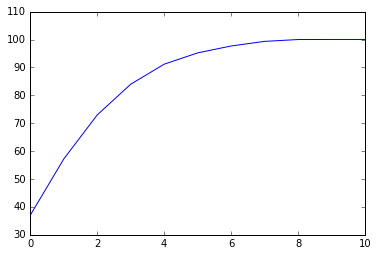

In [498]:
train = np.array(Good_Data)
test = np.array(Bad_Data)
train = scale(train)
test = scale(test)
pca = PCA(n_components=11 , whiten=True)
pca.fit(train)
pca.fit(test)
train = pca.transform(train)
test = pca.transform(test)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print var1 # Print the  Cumulative:
plt.plot(var1) # Print the features!

<b> 13) Fit and Preedict the One Class SVM, the sepate the anamolies </b>

In [519]:
# fit the model
test = np.array(Bad_Data)
test = scale(test)
pca.fit(test)
test = pca.transform(test)
clf = svm.OneClassSVM(kernel='rbf', degree=2, gamma=0.1, coef0=0.0,
                    tol=0.001, nu=0.1, shrinking=True, cache_size=200,
                    verbose=False, max_iter=-1, random_state=None)
clf.fit(train)
y_pred_train = clf.predict(train)
y_pred_test = clf.predict(test)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size


C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


<b> 15) Measuring the accuracy of ONE CLASS SVM </b>

   <b> The accuracy achieved is 86% <b>

In [488]:
from sklearn.metrics import accuracy_score
y_true = np.ones((1331,1), dtype=np.int)
accuracy_score(y_true, y_pred_train)

0.87002253944402708

<b> Approch 2--- SUPERVISED MACHINE LEARNING METHODS </b>

<b> 16) Creating the target column based the condition mentioned above </b>

In [510]:
a=['Acknowledged with work order', 'Fixed during inspection', 'Monitoring']
Long_Final['y']=0

for i in range(Long_Final.shape[0]):
    if (Long_Final['AM_1625008589'][i] in (a) ) or (Long_Final['AM_1625008593'][i] in (a) ) or (Long_Final['AM_1625005665'][i] in (a)) or (Long_Final['AM_1625005815'][i] in (a) ) or (Long_Final['AM_1625005814'][i] in (a) ) or (Long_Final['AM_1625005813'][i] in (a)) or (Long_Final['AM_1625005807'][i] in (a))  or (Long_Final['AM_1625005698'][i] in (a)) or (Long_Final['AM_1625005810'][i] in (a))  or (Long_Final['AM_1625005806'][i] in(a)) :
        Long_Final['y'][i]=1
    else:
        Long_Final['y'][i]=0

C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<b> 17) Labelling the Data </b>

In [538]:
for i  in Long_Final.columns:
    le = preprocessing.LabelEncoder()
    Long_Final[i] =le.fit_transform(Long_Final[i])

<b> 18) Splitting the Train and Test Data </b>

In [539]:
from sklearn.cross_validation import train_test_split
train=Long_Final.iloc[:,0:80]
Y = Long_Final.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.33, random_state=42)

<b> 19) Applying Logistice Regression </b>

In [540]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pca = PCA(n_components=40)
cls = LogisticRegression() 

#pipe = Pipeline([('pca', pca), ('logistic', clf)])
cls.fit(X_train, y_train)
predictions = cls.predict(X_test)

C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<b> 20) Calculating the Accuracy of Logistice Regression Model </b>

In [541]:
predictions = pd.DataFrame(predictions)
accuracy_score(y_test, predictions)

0.99322799097065462

<b> Other Supervised Learing Models -- 1) Random Forest Regression </b>

<b> The accuracy Obtained is 99%, seems like this mdel is overfitting </b>

In [542]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
rfc = RandomForestClassifier(n_estimators=100)
rfc=rfc.fit(X_train, y_train)
Y_pred= rfc.predict(X_test)
print('Confusion Matrix of : ',confusion_matrix(y_test, Y_pred), ' and its Accuracy: ', accuracy_score(y_test, Y_pred))

C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('Confusion Matrix of : ', array([[205,   0],
       [  1, 237]]), ' and its Accuracy: ', 0.99774266365688491)


<b> Other Supervised Learing Models -- 1) Ada Boost Regression </b>

<b> The accuracy Obtained is 99%, seems like this mdel is overfitting </b>

In [543]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",  n_estimators=200)

bdt=bdt.fit(X_train, y_train)
Y_pred= bdt.predict(X_test)
print('Confusion Matrix of : ',confusion_matrix(y_test, Y_pred), ' and its Accuracy: ', accuracy_score(y_test, Y_pred))

C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


('Confusion Matrix of : ', array([[205,   0],
       [  1, 237]]), ' and its Accuracy: ', 0.99774266365688491)


<b> Other Supervised Learing Models -- 1) Random Forest Regression </b>

<b> The accuracy Obtained is 93%, seems like this model is better than Random Forest and Adaboost </b>

In [544]:
from sklearn import datasets, svm
kernel_svm = svm.SVC(gamma=.2)
kernel_svm=kernel_svm.fit(X_train, y_train)
Y_pred= kernel_svm.predict(X_test)
print('Confusion Matrix of : ',confusion_matrix(y_test, Y_pred), ' and its Accuracy: ', accuracy_score(y_test, Y_pred))

('Confusion Matrix of : ', array([[177,  28],
       [  0, 238]]), ' and its Accuracy: ', 0.93679458239277658)


C:\Users\CJCCP0ol10\Anaconda2\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
